# Implementation of Neural Network:

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random

DATA UPLOADING 

In [2]:
train_df = pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Logistic regression/emnist-letters-train.csv',header=None)

In [3]:
train_df = train_df.to_numpy()   # Data converted into numpy array.

In [4]:
train_df                         # Data printing.

array([[23,  0,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  0,  0,  0],
       [16,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [23,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [5]:
X = train_df[:, 1:]             # Take features from data array and print.
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
m,n = X.shape          # m,n is the no. of rows and columns respectively in the features and print (m,n).
print((m,n))

(88800, 784)


In [7]:
Y = train_df[:, 0]     # Take actual output which contain letters position.

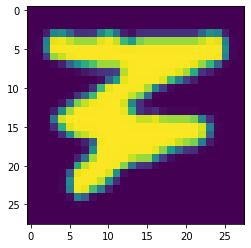

In [8]:
# visualizing the data, ploting first training example.
a = X[0, :]
plt.imshow(a.reshape(28, 28))
plt.show()

Actual output of each features data converted into (1, 26) numpy array in which letters position contain 1 and rest of them 0.

In [9]:
Y_new = np.array([[0 for i in range(26)]for i in range(m)])

In [10]:
for i in range(m):
    for j in range(26):
        if(Y[i]==j+1):
            Y_new[i][j]=1
            break

In [11]:
Y = Y_new
Y.shape

(88800, 26)

In [12]:
p = 100                   #  p is the no. of element in hidden layer. 
Hidden_layer = np.array([0 for i in range(p)])        # Assign hidden layer as 0 in array.

In [13]:
# 1st layer: Input layer(1, 784)
# 2nd layer: Hidden layer (1, p)
# 3rd layer: Output layer(1,26)

Declaring and defining all the function to build neural network.

In [14]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
   
# Creating the Feed forward neural network
#  Input layer(1, 784 )
#  hidden layer (1, p)
#  output layer(1, 26)

# Declare feed_forward function
def feed_forward(x, w1, w2):     
     
    # hidden layer    
    z1 = np.dot(x, w1) 
    a1 = sigmoid(z1) # output of layer 2
     
    # Output layer
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)# output of out layer
    return(a2)
  
# initializing the weights randomly
def generate_weight(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
     
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
    x = x.reshape((x.shape[0],1))
    y = y.reshape((y.shape[0], 1))
    
    # hidden layer
    z1 = np.dot(w1.T, x) 
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = np.dot(w2.T, a1)
    a2 = sigmoid(z2)# output of out layer
    
    # error in output layer
    d2 = (a2-y)
    
    # error in hidden layer
    r = (np.dot(w2, d2))
    s = np.multiply(a1, (1-a1))
    d1 = np.multiply(r, s)

    # Gradient for w1 and w2
    d_w1 = np.dot(x, d1.T)
    d_w2 = np.dot(a1, d2.T)
     
    # Updating parameters
    w1 = w1-(alpha*(d_w1))
    w2 = w2-(alpha*(d_w2))
     
    return(w1, w2) 

# Declare function for train dataset
def train(x, Y, w1, w2, alpha = 0.01, iters = 10):
    acc =[]
    for j in range(iters):
        count = 0
        for i in range(len(x)):
            out = feed_forward(x[i], w1, w2)
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
            if(np.argmax(out)==np.argmax(Y[i])):
                 count+=1
        percent_acc = (count*100)/(Y.shape[0])
        acc.append(percent_acc)

    return(acc, w1, w2)

#Declare predict function for prediction of y_pred, loss and acc on dataset using updated weights
def predict(x, Y, w1, w2):
    Out = feed_forward(x, w1, w2)
    maxm = 0
    k = 0
    y_pred = []
    for j in range(Y.shape[0]):
        for i in range(len(Out[j])):
            if(maxm<Out[j][i]):
                maxm = Out[j][i]
                k = i
            y_pred.append(k+1)
    l = np.mean(np.sum(np.square(Out - Y), axis = 1))
    print("loss = ", l)
    
    print("accuracy = ", (1-l)*100)
    
    return y_pred
   
  

In [15]:
w1 = generate_weight(784, 100)
w2 = generate_weight(100, 26)

In [16]:
acc, w1, w2 = train(X, Y, w1, w2, 0.001, 100)

C:\Users\adity\AppData\Local\Temp\ipykernel_21712\1454820921.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1 + np.exp(-x)))


In [17]:
acc

[16.37837837837838,
 30.670045045045047,
 39.615990990990994,
 44.060810810810814,
 47.78378378378378,
 49.734234234234236,
 50.799549549549546,
 53.039414414414416,
 54.55855855855856,
 55.7286036036036,
 56.226351351351354,
 56.549549549549546,
 56.865990990990994,
 57.505630630630634,
 58.07657657657658,
 58.60698198198198,
 59.626126126126124,
 60.26463963963964,
 60.7545045045045,
 61.60022522522522,
 61.810810810810814,
 61.71283783783784,
 62.208333333333336,
 62.888513513513516,
 62.98198198198198,
 63.42567567567568,
 63.240990990990994,
 63.718468468468465,
 63.943693693693696,
 64.17792792792793,
 63.697072072072075,
 63.6768018018018,
 63.69144144144144,
 64.27702702702703,
 64.50225225225225,
 64.6768018018018,
 65.21734234234235,
 65.43693693693693,
 66.19369369369369,
 66.13963963963964,
 65.60585585585585,
 65.60247747747748,
 66.68243243243244,
 67.56756756756756,
 67.14864864864865,
 67.14977477477477,
 67.17229729729729,
 67.58333333333333,
 66.7072072072072,
 67.034

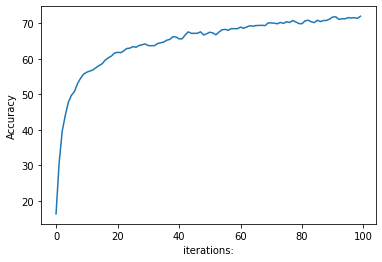

In [18]:
# ploting accuraccy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("iterations:")
plt.show()
 
# # plotting Loss
# plt.plot(losss)
# plt.ylabel('Loss')
# plt.xlabel("Epochs:")
# plt.show()

TEST ON TESTING DATASET USING PARAMETER W1 AND W2:

In [19]:
# upload test data.
test_df = pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Logistic regression/emnist-letters-test.csv',header=None)

In [20]:
# convert test data into numpy array.
test_df = test_df.to_numpy()

In [21]:
X_test = test_df[:, 1:]             # Take features from data array.

In [22]:
Y_test = test_df[:, 0]     # Take actual output which contain letters position.

Actual output of each features data converted into (1, 26) numpy array in which letters position contain 1 and rest of them 0:

In [23]:
Y_test_new = np.array([[0 for i in range(26)]for i in range(Y_test.shape[0])])

In [24]:
for i in range(Y_test.shape[0]):
    for j in range(26):
        if(Y_test[i]==j+1):
            Y_test_new[i][j]=1
            break

In [25]:
Y_test = Y_test_new

In [26]:
# Now predict on testing data and print loss and accuracy percentage.
y_pred = predict(X_test, Y_test, w1, w2)

loss =  0.46912388943226946
accuracy =  53.087611056773056


C:\Users\adity\AppData\Local\Temp\ipykernel_21712\1454820921.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1 + np.exp(-x)))


In [27]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 8,
 8,
 8,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1